# BOOK RECOMMENDATION SYSTEM

# Introduction:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScale

In [61]:
df=pd.read_csv("book1.csv")
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11-01-2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/2004,Da Capo Press,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12-01-1988,Penguin Books,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,08-01-1993,Penguin Books,NaN
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/2007,Ecco,NaN


In [62]:
df1 = df.copy()

In [63]:
df1

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11-01-2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/2004,Da Capo Press,NaN
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12-01-1988,Penguin Books,NaN
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,08-01-1993,Penguin Books,NaN
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/2007,Ecco,NaN


In [144]:
df1.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11-01-2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic


In [107]:
df1.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.857554
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.175990
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780350e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780590e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780870e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000


In [108]:
df1.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  float64
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


In [145]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11122    False
11123    False
11124    False
11125    False
11126    False
Length: 11127, dtype: bool

# Exploratory data analysis:

C:\Users\karan\AppData\Local\Temp\ipykernel_13236\1511582446.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='average_rating', ylabel='title'>

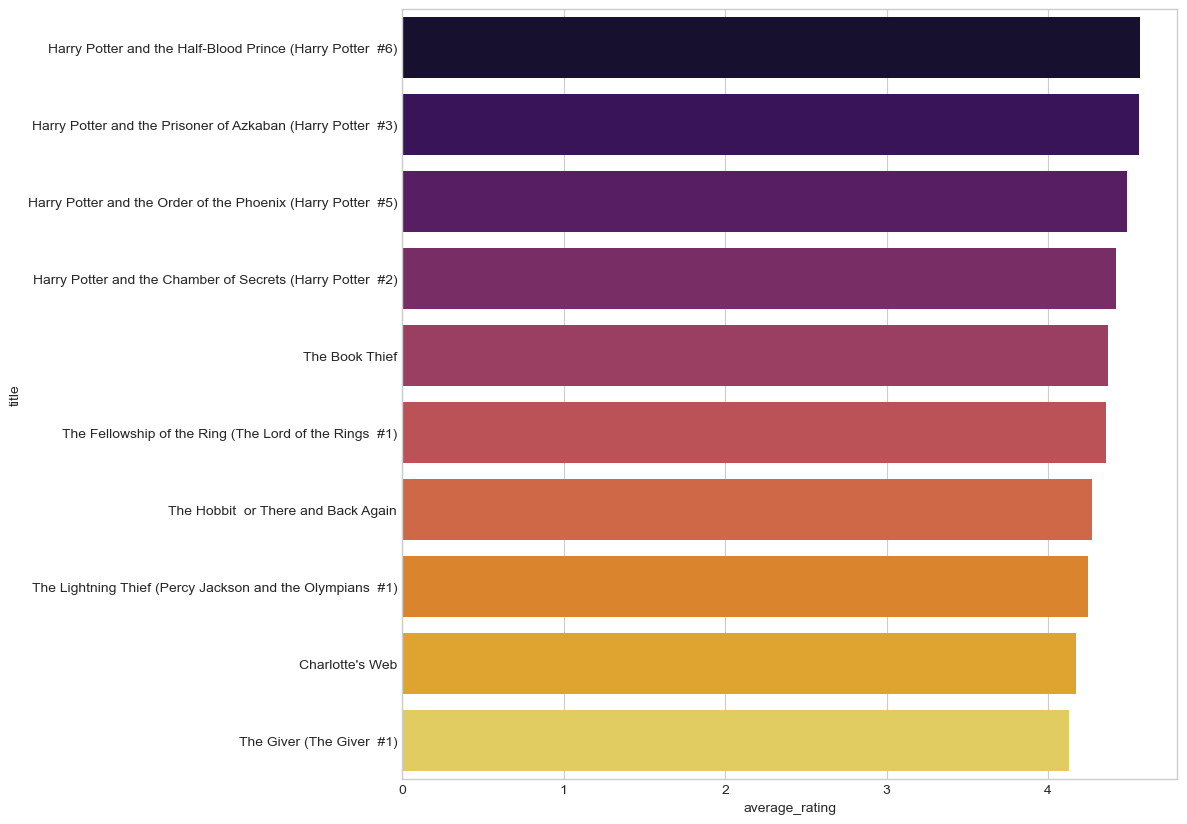

In [110]:
top_ten = df1[df1['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data, palette='inferno')

Text(0.5, 0, 'Total number of books')

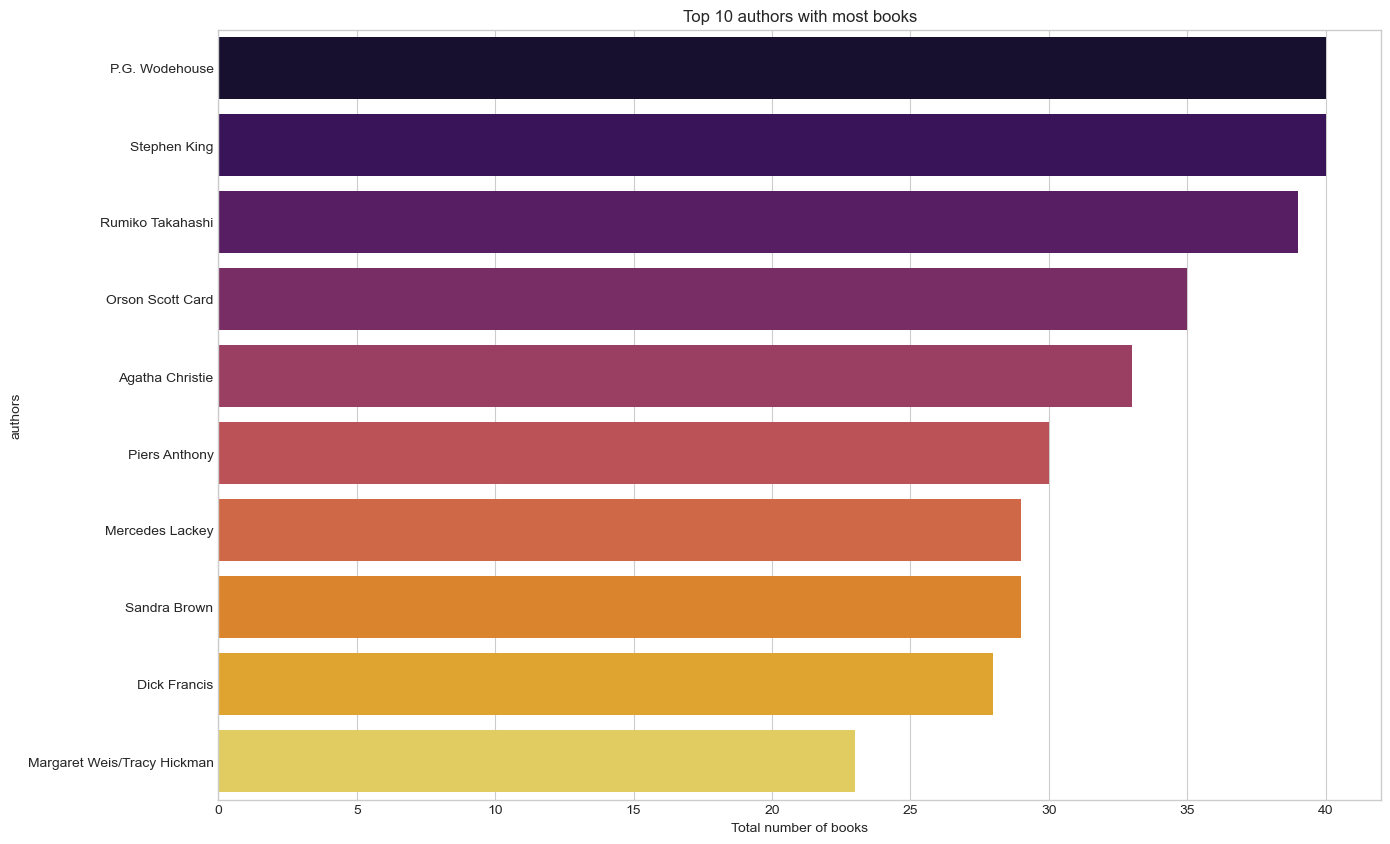

In [138]:
most_books = df1.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_books['title'], y=most_books.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")


Text(0, 0.5, 'Book Titles')

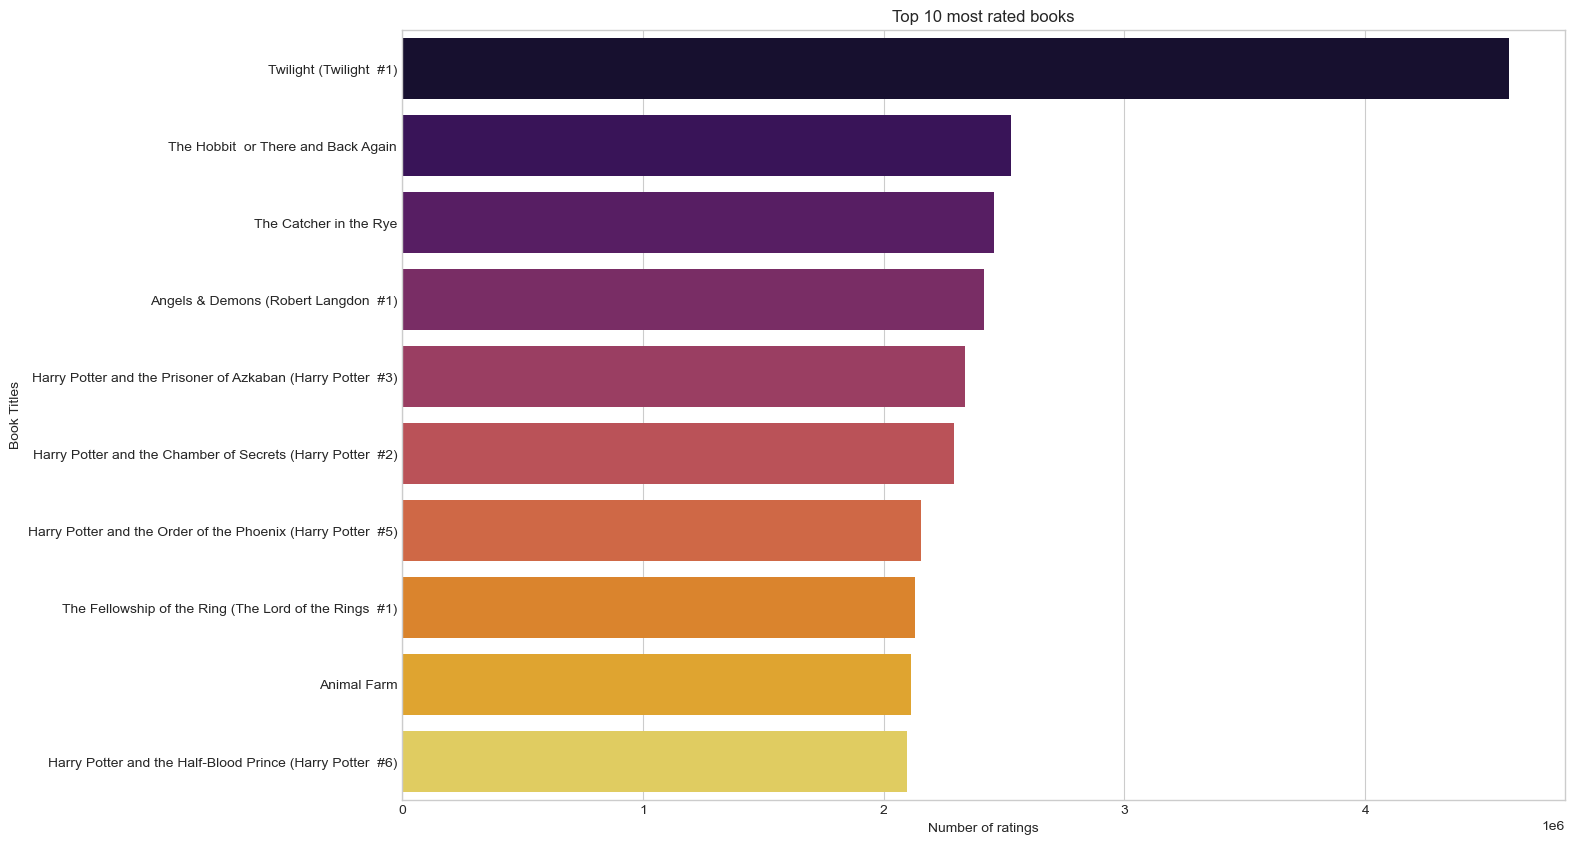

In [140]:
most_rated = df1.sort_values('ratings_count', ascending=False).head(10).set_index('title')
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='inferno')
ax.set_title("Top 10 most rated books")
ax.set_xlabel("Number of ratings")
ax.set_ylabel("Book Titles")


C:\Users\karan\AppData\Local\Temp\ipykernel_13236\3859986845.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'],ax=ax)


Text(0.5, 0, 'Average rating')

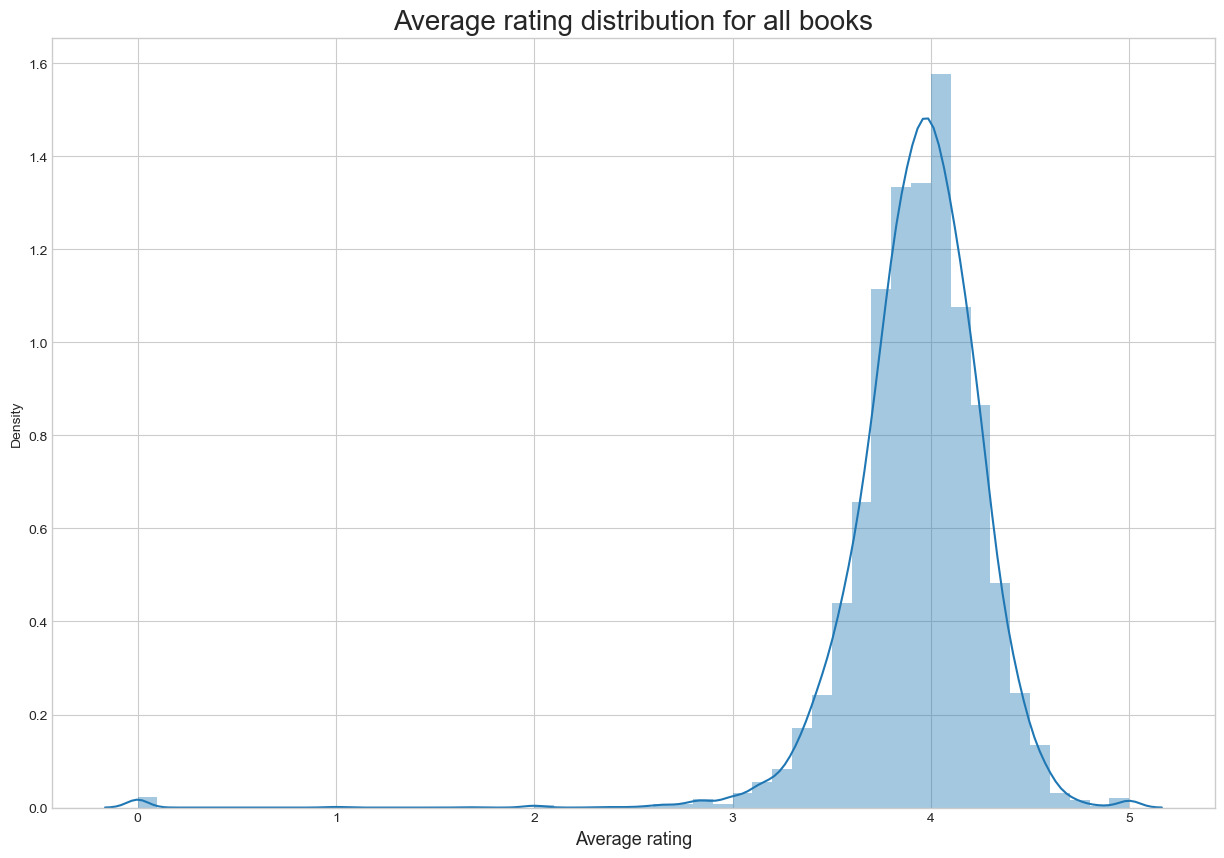

In [113]:
df1.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

C:\Users\karan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


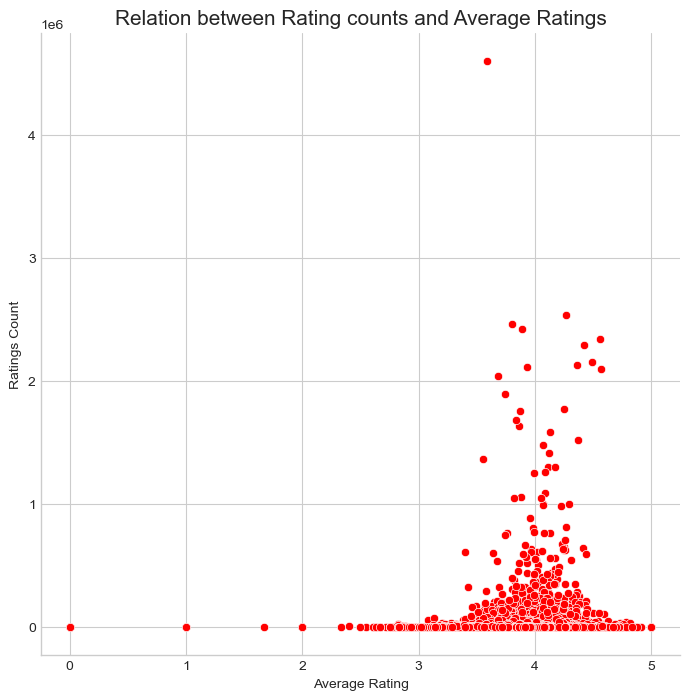

In [114]:
ax = sns.relplot(data=df1, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

C:\Users\karan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

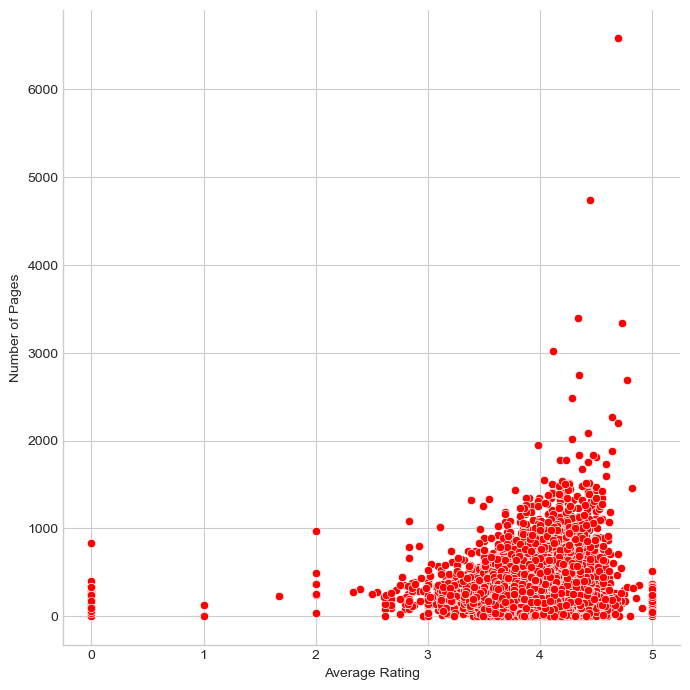

In [115]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="  num_pages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [120]:
df2= df1.copy()

# Data preparation:

In [121]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [122]:
df2

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11-01-2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/2004,Da Capo Press,between 4 and 5
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12-01-1988,Penguin Books,between 4 and 5
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,08-01-1993,Penguin Books,between 3 and 4
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/2007,Ecco,between 3 and 4


In [124]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language_code'])

In [126]:
features = pd.concat([rating_df, 
                      language_df, 
                      df2['average_rating'], 
                      df2['ratings_count']], axis=1)

In [127]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [128]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [130]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df2[df2['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df2.loc[newid].title)
    return book_list_name
    

In [133]:
BookNames = BookRecommender('You Bright and Risen Angels')
BookNames

['You Bright and Risen Angels',
 'Ranma 1/2  Vol. 34 (Ranma ½ (US 2nd)  #34)',
 'Dime Store Magic (Women of the Otherworld  #3)',
 "George Washington's Rules of Civility & Decent Behavior in Company and Conversation (Little Books of Wisdom)",
 'Orientalism',
 'The Dog Who Loved Too Much: Tales  Treatments and the Psychology of Dogs']

In [136]:
BookNames = BookRecommender('Poor People')
BookNames

['Poor People',
 "The Catcher in the Rye - Barron's Book Notes",
 'The Girl in the Glass',
 'Exemplary Stories',
 'RG Veda  Vol. 01',
 'Fire Lover: A True Story']